# MNIST_Fashion
* Simple Bi-CNN (without VG16 backbone)

Epoch 01 | Train Acc: 79.43% | Test Acc: 85.46% | Loss: 0.5869
Epoch 02 | Train Acc: 88.81% | Test Acc: 88.01% | Loss: 0.3116
Epoch 03 | Train Acc: 90.54% | Test Acc: 90.38% | Loss: 0.2615
Epoch 04 | Train Acc: 91.51% | Test Acc: 91.13% | Loss: 0.2310
Epoch 05 | Train Acc: 92.64% | Test Acc: 91.14% | Loss: 0.2052
Epoch 06 | Train Acc: 93.20% | Test Acc: 91.61% | Loss: 0.1870
Epoch 07 | Train Acc: 93.82% | Test Acc: 91.86% | Loss: 0.1729
Epoch 08 | Train Acc: 94.27% | Test Acc: 91.74% | Loss: 0.1597
Epoch 09 | Train Acc: 94.77% | Test Acc: 92.01% | Loss: 0.1466
Epoch 10 | Train Acc: 95.17% | Test Acc: 91.63% | Loss: 0.1349
Epoch 11 | Train Acc: 95.65% | Test Acc: 91.74% | Loss: 0.1225
Epoch 12 | Train Acc: 96.02% | Test Acc: 92.21% | Loss: 0.1148
Epoch 13 | Train Acc: 96.52% | Test Acc: 92.25% | Loss: 0.1018
Epoch 14 | Train Acc: 96.91% | Test Acc: 92.16% | Loss: 0.0925
Epoch 15 | Train Acc: 97.11% | Test Acc: 91.84% | Loss: 0.0849
Epoch 16 | Train Acc: 97.58% | Test Acc: 92.63% | Loss:

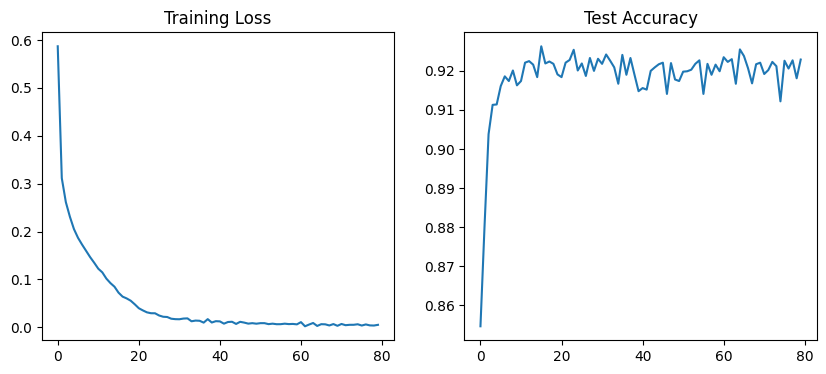

In [2]:
# ============================================================
# Simple Bilinear CNN on Fashion-MNIST
# ============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ============================================================
# Model Definition
# ============================================================
class SimpleBilinearCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),           # -> 14x14
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2)            # -> 7x7
        )
        # Bilinear pooling output: 256x256 features
        self.fc = nn.Linear(256 * 256, num_classes)

    def forward(self, x):
        x = self.features(x)  # [B, 256, 7, 7]
        B, C, H, W = x.size()
        x = x.view(B, C, H * W)
        # Bilinear pooling
        x = torch.bmm(x, x.transpose(1, 2)) / (H * W)  # [B, C, C]
        x = x.view(B, -1)
        x = torch.sign(x) * torch.sqrt(torch.abs(x) + 1e-10)  # signed sqrt
        x = F.normalize(x)
        return self.fc(x)

# ============================================================
# Train / Test Utilities (Same as before)
# ============================================================
def train(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct = 0, 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (logits.argmax(1) == labels).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

@torch.no_grad()
def test(model, loader, criterion, device):
    model.eval()
    total_loss, correct = 0, 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        logits = model(imgs)
        loss = criterion(logits, labels)
        total_loss += loss.item()
        correct += (logits.argmax(1) == labels).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

# ============================================================
# Main Script
# ============================================================
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_set = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    test_set = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

    model = SimpleBilinearCNN().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    train_accs, test_accs, losses = [], [], []
    for epoch in range(80):
        tr_loss, tr_acc = train(model, train_loader, optimizer, criterion, device)
        te_loss, te_acc = test(model, test_loader, criterion, device)
        train_accs.append(tr_acc); test_accs.append(te_acc); losses.append(tr_loss)
        print(f"Epoch {epoch+1:02d} | Train Acc: {tr_acc*100:.2f}% | Test Acc: {te_acc*100:.2f}% | Loss: {tr_loss:.4f}")

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.plot(losses); plt.title("Training Loss")
    plt.subplot(1,2,2); plt.plot(test_accs); plt.title("Test Accuracy")
    plt.show()

if __name__ == "__main__":
    main()


* Simple baseline CNN

Epoch 01 | Train Acc: 86.88% | Test Acc: 90.82% | Loss: 0.3638
Epoch 02 | Train Acc: 91.70% | Test Acc: 91.67% | Loss: 0.2318
Epoch 03 | Train Acc: 93.16% | Test Acc: 91.96% | Loss: 0.1896
Epoch 04 | Train Acc: 94.32% | Test Acc: 91.97% | Loss: 0.1573
Epoch 05 | Train Acc: 95.33% | Test Acc: 92.53% | Loss: 0.1272
Epoch 06 | Train Acc: 96.37% | Test Acc: 92.05% | Loss: 0.1013
Epoch 07 | Train Acc: 97.06% | Test Acc: 91.80% | Loss: 0.0821
Epoch 08 | Train Acc: 97.59% | Test Acc: 91.92% | Loss: 0.0666
Epoch 09 | Train Acc: 97.85% | Test Acc: 92.16% | Loss: 0.0588
Epoch 10 | Train Acc: 98.22% | Test Acc: 92.40% | Loss: 0.0482
Epoch 11 | Train Acc: 98.34% | Test Acc: 91.75% | Loss: 0.0472
Epoch 12 | Train Acc: 98.47% | Test Acc: 91.77% | Loss: 0.0434
Epoch 13 | Train Acc: 98.48% | Test Acc: 91.50% | Loss: 0.0434
Epoch 14 | Train Acc: 98.67% | Test Acc: 92.05% | Loss: 0.0405
Epoch 15 | Train Acc: 98.62% | Test Acc: 91.74% | Loss: 0.0407
Epoch 16 | Train Acc: 98.61% | Test Acc: 91.82% | Loss:

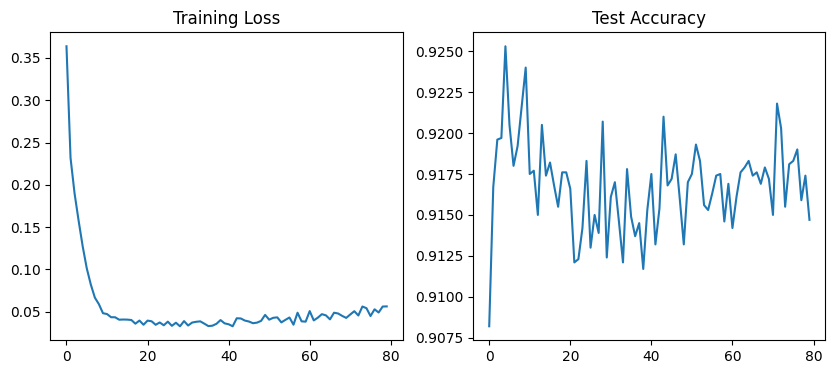

In [4]:
# ============================================================
# Simple CNN on Fashion-MNIST
# ============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ============================================================
# Model Definition
# ============================================================
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2),           # -> 14x14
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3, padding=1), nn.ReLU(inplace=True),
            nn.MaxPool2d(2)            # -> 7x7
        )
        self.classifier = nn.Linear(256 * 7 * 7, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# ============================================================
# Train / Test Utilities
# ============================================================
def train(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct = 0, 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (logits.argmax(1) == labels).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

@torch.no_grad()
def test(model, loader, criterion, device):
    model.eval()
    total_loss, correct = 0, 0
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        logits = model(imgs)
        loss = criterion(logits, labels)
        total_loss += loss.item()
        correct += (logits.argmax(1) == labels).sum().item()
    return total_loss / len(loader), correct / len(loader.dataset)

# ============================================================
# Main Script
# ============================================================
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    train_set = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
    test_set = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

    model = SimpleCNN().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()

    train_accs, test_accs, losses = [], [], []
    for epoch in range(80):
        tr_loss, tr_acc = train(model, train_loader, optimizer, criterion, device)
        te_loss, te_acc = test(model, test_loader, criterion, device)
        train_accs.append(tr_acc); test_accs.append(te_acc); losses.append(tr_loss)
        print(f"Epoch {epoch+1:02d} | Train Acc: {tr_acc*100:.2f}% | Test Acc: {te_acc*100:.2f}% | Loss: {tr_loss:.4f}")

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.plot(losses); plt.title("Training Loss")
    plt.subplot(1,2,2); plt.plot(test_accs); plt.title("Test Accuracy")
    plt.show()

if __name__ == "__main__":
    main()
